## Выполнение практического задания к уроку №7
### Тема “Введение в линейную алгебру”

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.linalg import lu

### 1. Вычислите, по возможности не используя программирование: (5E)-1 где Е – единичная матрица размера 5х5.

$5E =
\begin{pmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 1
\end{pmatrix}
$

$(5E)^{-1} = 1/5
\begin{pmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 1
\end{pmatrix}
$

#### Проверка

In [2]:
A = 5 * np.identity(5)
A

array([[5., 0., 0., 0., 0.],
       [0., 5., 0., 0., 0.],
       [0., 0., 5., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 5.]])

In [3]:
P = np.linalg.pinv(A)
P

array([[0.2, 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2]])

### 2. Вычислите определитель

$\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9\end{array}
\right)
$

In [4]:
a = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]], float)
print(a)
np.linalg.det(a)

[[1. 2. 3.]
 [4. 0. 6.]
 [7. 8. 9.]]


59.999999999999986

In [5]:
1*(0*9 - 6*8) - 2*(4*9 - 6*7) + 3*(4*8 - 0)

60

### 3. Вычислите матрицу, обратную данной

$\left(
\begin{array}{cccc}
1 & 2 & 3\\
4 & 0 & 6\\
7 & 8 & 9\end{array}
\right)
$

In [6]:
np.linalg.inv(a)

array([[-0.8       ,  0.1       ,  0.2       ],
       [ 0.1       , -0.2       ,  0.1       ],
       [ 0.53333333,  0.1       , -0.13333333]])

### 3.1 Приведите пример матрицы 4х4, ранг которой равен 1.

In [7]:
c = np.array([[1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]], float)
print(c)
np.linalg.matrix_rank(c, 0.0001)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


1

### 4. Вычислите скалярное произведение двух векторов (1, 5)  и  (2, 8):

In [8]:
f = np.array([1, 5])
d = np.array([2, 8])
f @ d

42

### 5. Вычислите смешанное произведение трех векторов: (1, 5, 0), (2, 8, 7) и (7, 1.5, 3) 

In [9]:
x = np.array([1, 5, 0])
y = np.array([2, 8, 7])
z = np.array([7, 1.5, 3])

In [10]:
np.dot(x, np.cross(y, z))

228.5

### Тема “Системы линейных алгебраических уравнений”

### 6. Решите линейную систему

$$\begin{bmatrix}
1 & 2 & 3 \\
4 & 0 & 6 \\
7 & 8 & 9
\end{bmatrix} \cdot X = 
\begin{bmatrix}
12 \\ 2 \\ 1
\end{bmatrix}
$$

In [11]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])

np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

### 7. Найдите псевдорешение

$$\begin{cases}
x+2y-z=1\\
3x-4y=7\\
8x-5y+2z=12\\
2x-5z=7\\
11x+4y-7z=15\end{cases}
$$

In [12]:
A = np.array([[1, 2, -1], 
              [3, -4, 0], 
              [8, -5, 2], 
              [2, 0, -5], 
              [11, 4, -7]])
B = np.array([1, 7, 12, 7, 12])

np.linalg.lstsq(A, B, rcond=None)

(array([ 0.96772642, -1.11719341, -0.89887891]),
 array([2.77449966]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

### 8. Сколько решений имеет линейная система

$$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix} \cdot X = 
\begin{bmatrix}
12 \\ 2 \\ 1
\end{bmatrix}
$$

In [13]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])

C = np.concatenate((A, B.T), axis=1)
C

array([[ 1,  2,  3, 12],
       [ 4,  5,  6,  2],
       [ 7,  8,  9,  1]])

In [14]:
np.linalg.matrix_rank(A, 0.0001) != np.linalg.matrix_rank(C, 0.0001)

True

#### Решений нет. Меняем вектор правой части.

In [15]:
B = np.array([12, 12, 12])
np.linalg.lstsq(A, B, rcond=None)

(array([-6.0000000e+00,  8.8817842e-16,  6.0000000e+00]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]))

### 9. Вычислите LU-разложение матрицы

$$\begin{bmatrix}
1 & 2 & 3 \\
2 & 16 & 21 \\
4 & 28 & 73
\end{bmatrix}$$

In [16]:
A = np.array([[1,2,3],
              [2,16,21],
              [4,28,73]])

In [17]:
_, L, U = lu(A)
L, U

(array([[ 1.  ,  0.  ,  0.  ],
        [ 0.25,  1.  ,  0.  ],
        [ 0.5 , -0.4 ,  1.  ]]),
 array([[  4.  ,  28.  ,  73.  ],
        [  0.  ,  -5.  , -15.25],
        [  0.  ,   0.  , -21.6 ]]))

In [18]:
B = np.array([4, 1, 7])
np.linalg.solve(A, B)

array([ 5.12962963, -0.67592593,  0.07407407])

### 10. Найдите нормальное псевдорешение недоопределенной системы

$$\begin{cases}
x+2y-z=1\\
8x-5y+2z=12\end{cases}
$$

In [19]:
A = np.array([[1, 2, -1],[8, -5, 2]])
B = np.array([1, 12])

def Q(x, y, z):
    return (x**2 + y**2 + z**2)

#### Первое приближение

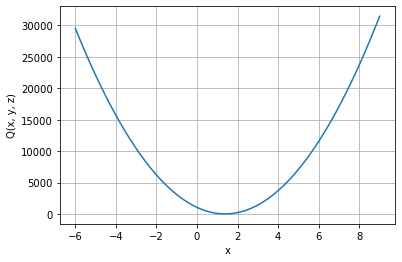

In [20]:
x = np.linspace(-6, 9, 128)
y = 10 * x - 14
z = x + 2 * y - 1

plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)

#### Локализуем минимум

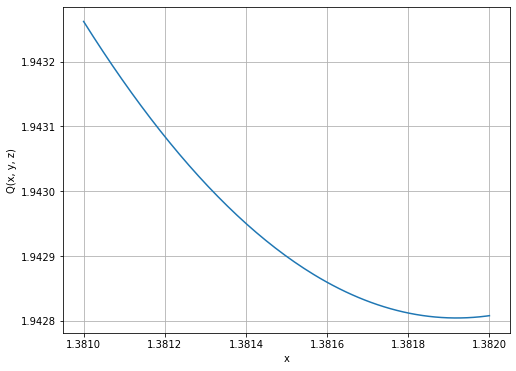

In [21]:
x = np.linspace(1.381, 1.382, 128)
y = 10 * x - 14
z = x + 2 * y - 1

plt.figure(figsize=(8, 6))
plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)

#### Из визуального анализа

In [22]:
x = 1.3819
y = 10 * x - 14
z = x + 2 * y - 1

X1 = np.array([x, y, z])
X1

array([ 1.3819, -0.181 ,  0.0199])

#### Нормальное псевдорешение числовым методом

In [23]:
X2 = np.linalg.lstsq(A, B, rcond=None)[0]
X2

array([ 1.38191882, -0.18081181,  0.0202952 ])

#### Проверка

In [24]:
A @ X1, A @ X2

(array([ 1., 12.]), array([ 1., 12.]))

### 11. Найдите одно из псевдорешений вырожденной системы

$$\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix} \cdot X = 
\begin{bmatrix}
2 \\ 5 \\ 11
\end{bmatrix}
$$

In [25]:
A = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
B = np.array([2, 5, 11])

np.linalg.lstsq(A, B, rcond=None)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 4.41842475e-16]))

#### Найдем нормальное псевдорешение

In [26]:
def Q(x):
    y = 2.5 - 2 * x
    z = x - 1
    return (x**2 + y**2 + z**2)

In [27]:
x = scipy.optimize.minimize(Q, (0)).x[0]
y = 2.5 - 2 * x
z = x - 1
x, y, z

(0.9999999934100475, 0.500000013179905, -6.589952472602079e-09)